# Chapter 3 Applied Labs


## Q13 (fitting to simulated data)

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.anova
sns.set(style="whitegrid")

### (a) Create a vector `x` containing 100 observations drawn from `N(0,1)`

In [2]:
x = np.random.normal(size=100)

### (b) Create a vector `eps` containing 100 observations drawn from `N(0,0.25)`

In [3]:
eps = np.random.normal(loc=0, scale=0.25, size=100)

### (c) Generate `y` according to `y = -1 +0.5x + eps`

In [4]:
# This vector has length 100, and has B0 = -1, B1 = 0.5
y = -1 + 0.5*x + eps

### (d) Create a scatterplot displaying the relationship between `x` and `y`, and comment.

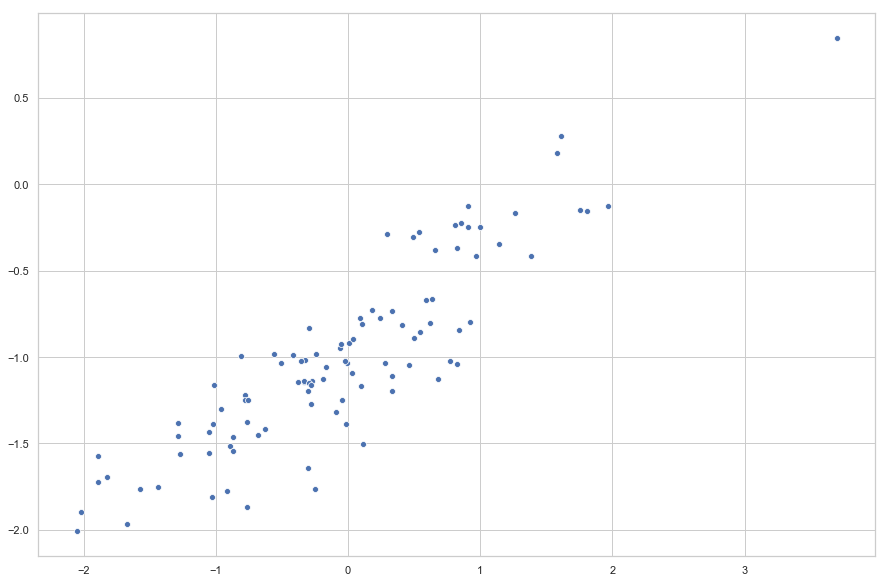

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x=x, y=y, ax=ax)

By eye, the data passes through (0,-1) and has a slope of 1/2, and a total spread in y values of roughly 1.0 (i.e. almost all points are within $2\sigma$ where $\sigma=0.25$ )

### (e) Fit a least-squares linear model to predict y using x. How do $\hat{\beta_0}$ and $\hat{\beta_1}$ compare to the true values $\beta_0$ and $\beta_1$?

In [6]:
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     371.3
Date:                Fri, 17 May 2019   Prob (F-statistic):           4.21e-35
Time:                        13:37:28   Log-Likelihood:               -0.96903
No. Observations:                 100   AIC:                             5.938
Df Residuals:                      98   BIC:                             11.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9791      0.025    -39.601      0.000      -1.028      -0.930
x1             0.4929      0.026     19.269      0.000       0.442       0.544
==============================================================================
Omnibus:                        2.129   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.903
Skew:                          -0.338   Prob(JB):                        0.386
Kurtosis:                       2.974   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat{\beta_0} = -1.02 \pm 0.03$, and $\hat{\beta_1} = 0.52 \pm 0.02$, i.e. the predicted values agree with the true values.

In [7]:
rough_sigma = np.sqrt(results.mse_resid)
print(rough_sigma)  # agrees with the eps with a standard deviation of 0.25 we added to the data

0.24680742725705337


### (f) plot the regression line.

-0.979123261667798 0.4928603576433848


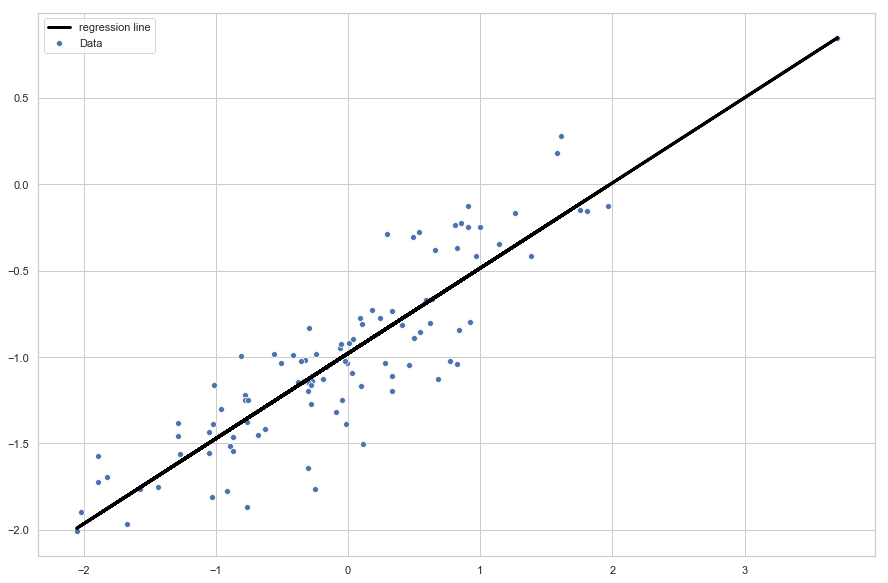

In [8]:
B0, B1 = results.params
print(B0, B1)
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x=x, y=y, ax=ax, label="Data")
plt.plot(x,B0+B1*x, linewidth=3, color="black", label="regression line" )
plt.legend()

### (g) Fit a quadratic model using `x` and `x^2` to predict `y`. Is there any evidence that the quadratic term improves the fit?

In [9]:
# Create a DataFrame
test_data = pd.DataFrame(zip(x,y), columns=["x","y"])
quadratic_model = smf.ols('y ~ x + np.square(x)', data=test_data) # == lstat+age+lstat:age
quadratic_results = quadratic_model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     371.3
Date:                Fri, 17 May 2019   Prob (F-statistic):           4.21e-35
Time:                        13:37:28   Log-Likelihood:               -0.96903
No. Observations:                 100   AIC:                             5.938
Df Residuals:                      98   BIC:                             11.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9791      0.025    -39.601      0.0

In [10]:
statsmodels.stats.anova.anova_lm(results, quadratic_results)

/home/will/.local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/will/.local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/will/.local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,5.969563,0.0,NaN,NaN,NaN
1,97.0,5.887450,1.0,0.082113,1.352863,0.247632


The p-value for the x^2 term shows that this term is not statistically significant. In addition, using ANOVA we can see that the p value for the F statistic is high, suggesting we can't reject the null hypothesis that both models fit the data equally well.

### (h) repeat a-f using less noisy data. Describe your results

In [11]:
lower_eps = np.random.normal(loc=0, scale=0.125, size=100)
less_noisy_y = -1 + 0.5*x + lower_eps

In [12]:
model = sm.OLS(less_noisy_y, sm.add_constant(x))
less_noisy_results = model.fit()
less_noisy_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1904.
Date:                Fri, 17 May 2019   Prob (F-statistic):           5.13e-66
Time:                        13:37:28   Log-Likelihood:                 77.632
No. Observations:                 100   AIC:                            -151.3
Df Residuals:                      98   BIC:                            -146.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9900      0.011    -87.877      0.000      -1.012      -0.968
x1             0.5086      0.012     43.639      0.000       0.485       0.532
==============================================================================
Omnibus:                        0.774   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.679   Jarque-Bera (JB):                0.713
Skew:                           0.202   Prob(JB):                        0.700
Kurtosis:                       2.913   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
rough_sigma = np.sqrt(less_noisy_results.mse_resid)
print(rough_sigma)  # agrees with the eps with a standard deviation of 0.25 we added to the data

0.11246043913131643


-0.9900186020511492 0.5086102502863081


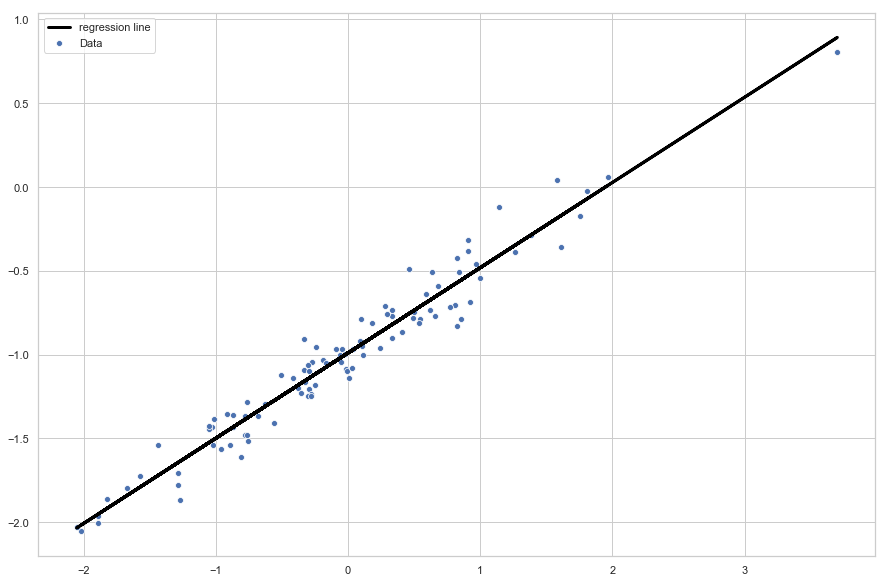

In [14]:
B0, B1 = less_noisy_results.params
print(B0, B1)
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x=x, y=less_noisy_y, ax=ax, label="Data")
plt.plot(x,B0+B1*x, linewidth=3, color="black", label="regression line" )
plt.legend()

R^2 has gone up, from 0.827 to 0.951. The value of F has increased. The std_errs in the predicted coefficients have halved.


### (i) repeat a-f using more noisy data. Describe your results

In [15]:
higher_eps = np.random.normal(loc=0, scale=0.5, size=100)
more_noisy_y = -1 + 0.5*x + higher_eps

In [16]:
model = sm.OLS(more_noisy_y, sm.add_constant(x))
noisy_results = model.fit()
noisy_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     77.75
Date:                Fri, 17 May 2019   Prob (F-statistic):           4.44e-14
Time:                        13:37:29   Log-Likelihood:                -71.633
No. Observations:                 100   AIC:                             147.3
Df Residuals:                      98   BIC:                             152.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9994      0.050    -19.940      0.000      -1.099      -0.900
x1             0.4572      0.052      8.817      0.000       0.354       0.560
==============================================================================
Omnibus:                        0.355   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.494
Skew:                           0.122   Prob(JB):                        0.781
Kurtosis:                       2.757   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
rough_sigma = np.sqrt(noisy_results.mse_resid)
print(rough_sigma)  # agrees with the eps with a standard deviation of 0.25 we added to the data

0.5003187943670625


-0.9994282940267231 0.4571906770951232


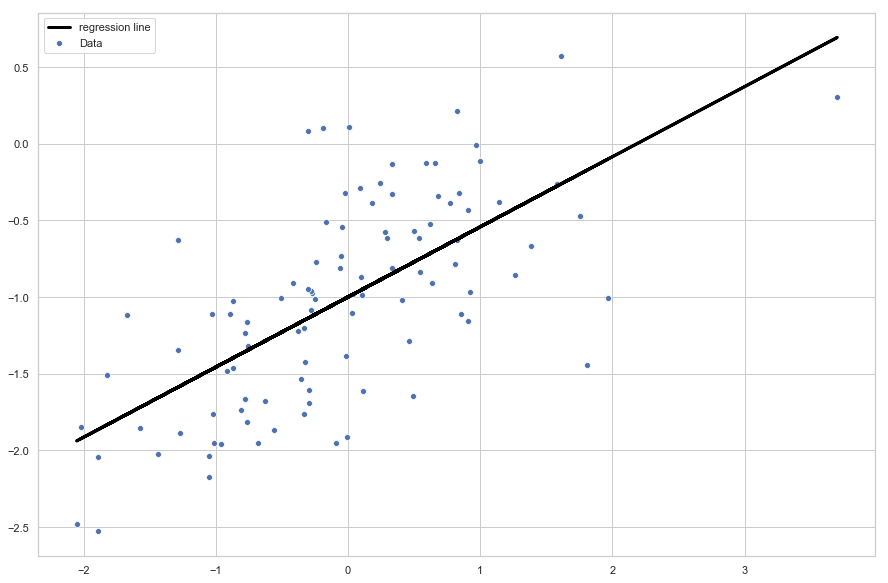

In [18]:
B0, B1 = noisy_results.params
print(B0, B1)
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x=x, y=more_noisy_y, ax=ax, label="Data")
plt.plot(x,B0+B1*x, linewidth=3, color="black", label="regression line" )
plt.legend()

R^2 has gone down, as has F. The std_errs in the predicted coefficients have doubled.


### (j) What are the confidence intervals for each dataset?

In [19]:
for i in range(2):
    for fit in [less_noisy_results, results, noisy_results]:
        print(fit.conf_int()[i])
    print()

[-1.01237564 -0.96766156]
[-1.02818837 -0.93005815]
[-1.09889125 -0.89996534]

[0.48548158 0.53173892]
[0.44210183 0.54361889]
[0.35429488 0.56008647]



In [20]:
for i in range(2):
    for fit in [less_noisy_results, results, noisy_results]:
        print(fit.conf_int()[i][1]-fit.conf_int()[i][0])
    print()

0.04471408299125257
0.09813022135137961
0.19892591800473114

0.046257332414313845
0.10151706051601173
0.2057915918071611



We expect the standard error to be roughly 4 sigma (2 sigma either side). This is indeed the case